In [1]:
from keras.models import Sequential 
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist

from extra_keras_datasets import kmnist

import numpy as np
import matplotlib.pyplot as plt
import random

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
x_train_noise = []
for item in range(x_train.shape[0]):
    noise = np.zeros(x_train[0].shape)
    n = random.randrange(20)
    for i in range(n, n+9):
        for j in range(n, n+9):
            noise[i,j] =  0.7 * np.random.normal(loc=200, scale=25.0)
    noise = np.uint8(noise)
    x_train_noise.append(x_train[item] + noise)
x_train_noise = np.array(x_train_noise)

x_test_noise = []         
for item in range(x_test.shape[0]):
    noise = np.zeros(x_test[0].shape)
    n = random.randrange(20)
    for i in range(n, n+9):
        for j in range(n, n+9):
            noise[i,j] =  0.7 * np.random.normal(loc=200, scale=25.0)
    noise = np.uint8(noise)
    x_test_noise.append(x_test[item] + noise)
x_test_noise = np.array(x_test_noise)

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

x_train_noise = x_train_noise.astype('float32') / 255.
x_test_noise = x_test_noise.astype('float32') / 255.

x_train_noise = x_train_noise.reshape((len(x_train_noise), np.prod(x_train_noise.shape[1:])))
x_test_noise = x_test_noise.reshape((len(x_test_noise), np.prod(x_test_noise.shape[1:])))


print(x_train.shape)
print(x_test.shape)
print(x_train_noise.shape)
print(x_test_noise.shape)

(60000, 784)
(10000, 784)
(60000, 784)
(10000, 784)


Orignal Image:


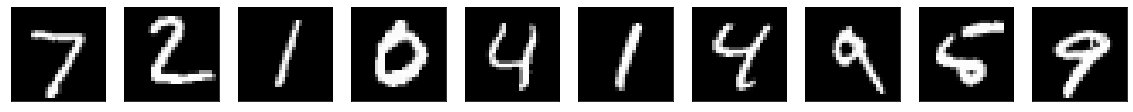

Noisy Image:


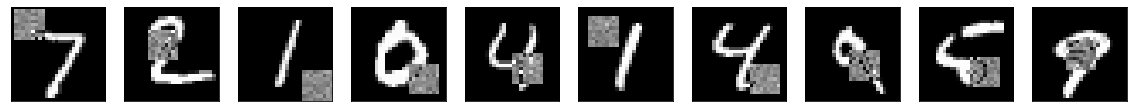

In [7]:
n = 10

print('Orignal Image:')
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print('Noisy Image:')
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [8]:
encoding_dim = 15

input_img = Input(shape=(x_train[0].shape))
encoded_1 = Dense(200, activation='relu')(input_img)
encoded_2 = Dense(100, activation='relu')(encoded_1)
encoded_3 = Dense(30, activation='relu')(encoded_2)
encoded = Dense(encoding_dim, activation='relu')(encoded_3)
decoded_3 = Dense(30, activation='relu')(encoded)
decoded_2 = Dense(100, activation='relu')(decoded_3) 
decoded_1 = Dense(200, activation='relu')(decoded_2) 
decoded = Dense((x_train[0].shape[0]), activation='sigmoid')(decoded_1)

autoencoder = Model(inputs=input_img, outputs=decoded)

autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 200)               157000    
                                                                 
 dense_9 (Dense)             (None, 100)               20100     
                                                                 
 dense_10 (Dense)            (None, 30)                3030      
                                                                 
 dense_11 (Dense)            (None, 15)                465       
                                                                 
 dense_12 (Dense)            (None, 30)                480       
                                                                 
 dense_13 (Dense)            (None, 100)               3100

In [9]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_train_noise, x_train, epochs=30, batch_size=256, validation_data=(x_test_noise, x_test))

Epoch 1/30
235/235 [==============================] - 3s 11ms/step - loss: 0.2669 - val_loss: 0.2017
Epoch 2/30
235/235 [==============================] - 3s 11ms/step - loss: 0.1843 - val_loss: 0.1691
Epoch 3/30
235/235 [==============================] - 3s 11ms/step - loss: 0.1635 - val_loss: 0.1589
Epoch 4/30
235/235 [==============================] - 3s 11ms/step - loss: 0.1542 - val_loss: 0.1493
Epoch 5/30
235/235 [==============================] - 3s 12ms/step - loss: 0.1471 - val_loss: 0.1444
Epoch 6/30
235/235 [==============================] - 3s 12ms/step - loss: 0.1428 - val_loss: 0.1405
Epoch 7/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1398 - val_loss: 0.1381
Epoch 8/30
235/235 [==============================] - 2s 11ms/step - loss: 0.1377 - val_loss: 0.1367
Epoch 9/30
235/235 [==============================] - 2s 11ms/step - loss: 0.1359 - val_loss: 0.1351
Epoch 10/30
235/235 [==============================] - 2s 10ms/step - loss: 0.1346 - val_lo

In [10]:
decoded_img = autoencoder.predict(x_test)

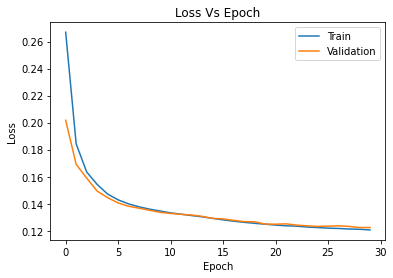

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

Orignal Image:


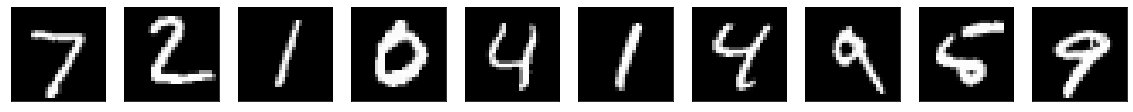

Noisy Image:


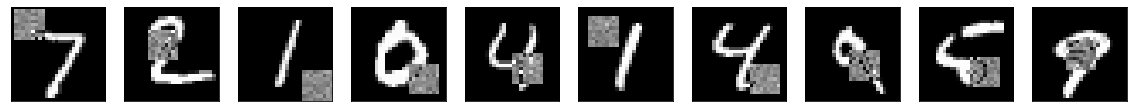

Reconstructed Image:


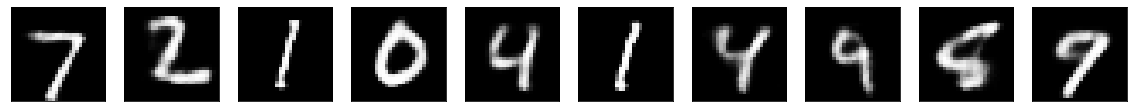

In [12]:
n = 10

print('Orignal Image:')
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print('Noisy Image:')
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print('Reconstructed Image:')
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()